In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
import re

In [2]:
df=pd.read_csv("토픽2.csv")
df

,Unnamed: 0,별점,리뷰 내용
0,1,4,We have walked up and down It is a good walk ...
1,2,4,It was a bit late to open and it was raining ...
2,6,1,I went a few years ago and I didnt like it it...
3,9,5,Worth a visit and one of the beautiful landma...
4,34,5,The tower is only worth going up once It was ...
...,...,...,...
2709,15441,5,Theres a car up there but we just walked under...
2710,15446,5,This is a wonderful place and its a mustvisit...
2711,15448,4,Its a famous place in Seoul but there are alw...
2712,15461,5,Christmas organized the event very beautifully


In [3]:
review=[]
for i in df['리뷰 내용']:
    i=i.lower()
    review.append(i)

df['리뷰 내용']=review
df

,Unnamed: 0,별점,리뷰 내용
0,1,4,we have walked up and down it is a good walk ...
1,2,4,it was a bit late to open and it was raining ...
2,6,1,i went a few years ago and i didnt like it it...
3,9,5,worth a visit and one of the beautiful landma...
4,34,5,the tower is only worth going up once it was ...
...,...,...,...
2709,15441,5,theres a car up there but we just walked under...
2710,15446,5,this is a wonderful place and its a mustvisit...
2711,15448,4,its a famous place in seoul but there are alw...
2712,15461,5,christmas organized the event very beautifully


In [4]:
keyword=input("키워드 입력 : ")
df_a = df[df['리뷰 내용'].str.contains(keyword)]
for i in df_a['리뷰 내용']:
    print("="*100)
    print(i)

superb experience seeing whole of seoul from the top absolutely must do thing if you are visiting seoul for the first time
loved the view even though it was raining will definitely go back to experience more of the attractions
 crazy experience for those who love and not seoul this is the right place to see nature and modernity embrace each other 
beautiful experience
very good experience good views from the top however we went on a clear day so it could be different on a rainy day lift was a bit tacky but overall would reccomend going for the views 
overall excellent experience dont try to drive there unless you know the way navi apps dont quite work the taxi took us on our second attempt long walk up to the tower but there is a gondola option lots of food and souvenir shopping options up there we waited 40 minutes for our queue to go on up it was t quite and large as i though once up there but the views were amazing go at night for the best experience a lot of others scenic spots on 

In [5]:
df_a

,Unnamed: 0,별점,리뷰 내용
9,59,5,superb experience seeing whole of seoul from t...
13,90,5,loved the view even though it was raining will...
21,186,5,crazy experience for those who love and not s...
33,269,5,beautiful experience
35,300,4,very good experience good views from the top h...
...,...,...,...
2668,15045,5,a lovely experience recommended
2672,15083,5,great experience with a nice view
2676,15107,5,great experience
2679,15129,4,good experience


In [6]:
starlist=df_a['별점']

(array([  5.,   0.,   4.,   0.,   0.,  29.,   0.,  75.,   0., 103.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

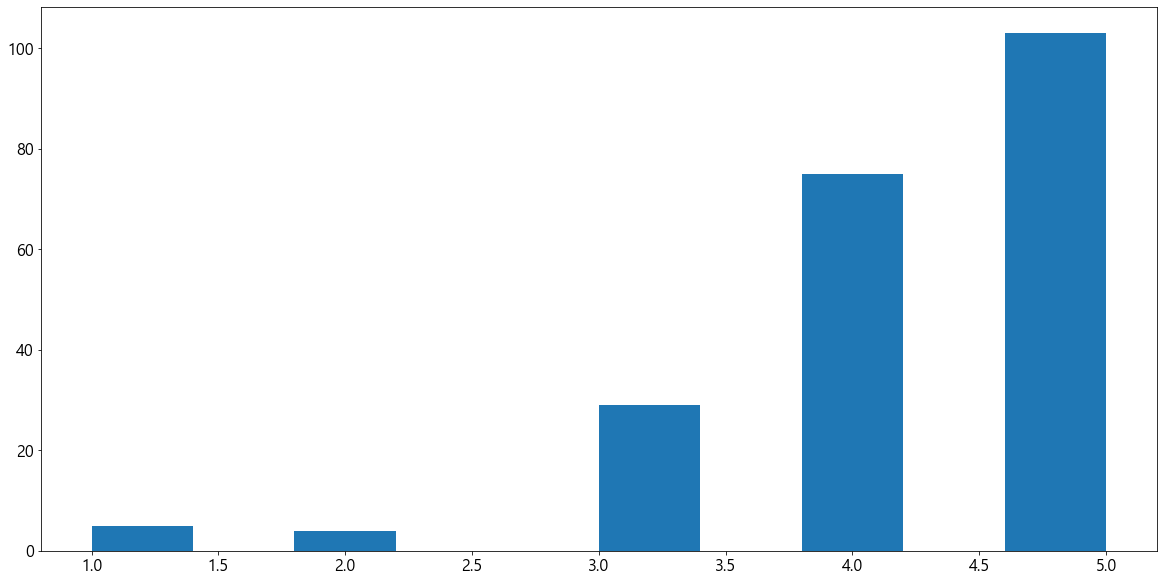

In [7]:
plt.hist(starlist)

In [8]:
#불용어 추가
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
add_stop_words = ["'", ",", "'s", ":", ".", "?", "!","(",")","n't"]
for word in add_stop_words:
    stop_words.add(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
text = df_a[['리뷰 내용']]
text

,리뷰 내용
9,superb experience seeing whole of seoul from t...
13,loved the view even though it was raining will...
21,crazy experience for those who love and not s...
33,beautiful experience
35,very good experience good views from the top h...
...,...
2668,a lovely experience recommended
2672,great experience with a nice view
2676,great experience
2679,good experience


superb      experience      1
experience  seeing          1
back        experience      1
experience  attractions     1
crazy       experience      1
experience  love            1
beautiful   experience      1
good        experience     16
experience  good            5
excellent   experience      1
experience  dont            3
best        experience      2
experience  lot             2
great       experience     19
experience  visit           5
dtype: int64


Text(0.5, 0, '# of Occurances')

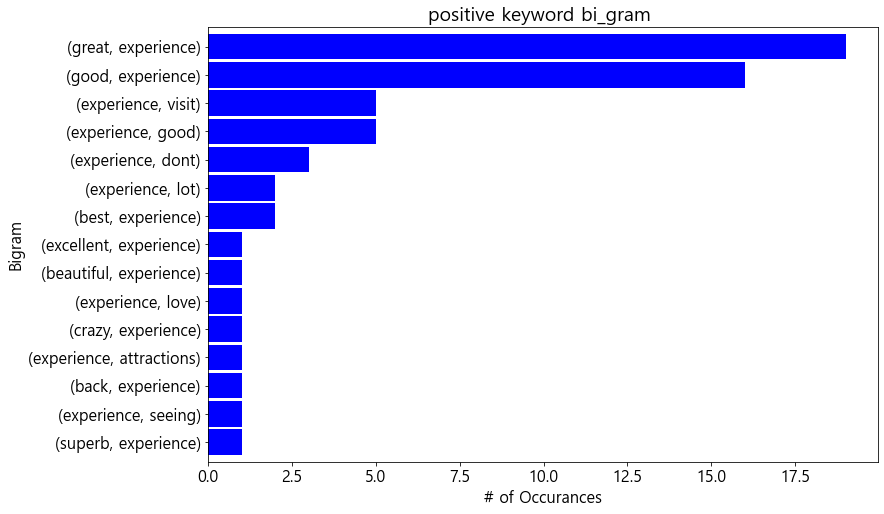

In [10]:
from nltk.stem import WordNetLemmatizer
text = df_a[['리뷰 내용']]
new=pd.Series()
kw=[]
keyword='experience'
text_arr=[[]for i in range(len(df_a['리뷰 내용']))]
#토큰화
text['리뷰 내용'] = text.apply(lambda row: nltk.word_tokenize(row['리뷰 내용']), axis=1)

#불용어 처리
text['리뷰 내용'] = text['리뷰 내용'].apply(lambda x: [word.lower() for word in x])
text['리뷰 내용'] = text['리뷰 내용'].apply(lambda x: [word for word in x if word not in (stop_words)])

#표제어 추출
#text['리뷰 내용'] = text['리뷰 내용'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
    
#길이가 3이하인 단어에 대해서 제거하는 작업을 수행
tokenized_doc = text['리뷰 내용'].apply(lambda x : [word for word in x if len(word) > 3])

#바이그램

for i in text.index:
    wordnet=pd.Series(nltk.ngrams(text['리뷰 내용'][i], 2))
    num=0
    for j in wordnet:
        if wordnet[num][0]==keyword or wordnet[num][1]==keyword:
            kw.append(wordnet[num])
        num+=1
            
from collections import Counter
k=pd.Series(Counter(kw))[:15]
#kw.value_counts()[:12]
print(k)

k.sort_values().plot.barh(color='blue', width=0.9, figsize=(12, 8))
plt.title('positive keyword bi_gram ')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
num=0
nump=0
numn=0
n=0
for i in df_a['리뷰 내용']:
    score=sia.polarity_scores(i)
    compound=score['compound']
    print(score)
    if compound<0:
        numn+=1
        num-=1
        print(num)
    elif compound>0:
        num+=1
        nump+=1
        print(num)
    elif compound==0:
        n+=1
        num=num
        print(num)
print("긍정 : ",nump," 부정 : ",numn," 중립 : ",n)
if num>0:
    pn='긍정'
elif num<0:
    pn='부정'
elif num==0:
    pn='중립'
print("=================================================")      
print("리뷰 개수 : " ,len(df_a['리뷰 내용']))
print("최종 점수 : ", num)
print(keyword," : ",pn)

{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.7096}
1
{'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.8646}
2
{'neg': 0.086, 'neu': 0.681, 'pos': 0.233, 'compound': 0.6249}
3
{'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'compound': 0.5994}
4
{'neg': 0.031, 'neu': 0.772, 'pos': 0.197, 'compound': 0.642}
5
{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.9366}
6
{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.9233}
7
{'neg': 0.052, 'neu': 0.708, 'pos': 0.24, 'compound': 0.8784}
8
{'neg': 0.048, 'neu': 0.779, 'pos': 0.173, 'compound': 0.9565}
9
{'neg': 0.067, 'neu': 0.898, 'pos': 0.035, 'compound': -0.8188}
8
{'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'compound': 0.1139}
9
{'neg': 0.014, 'neu': 0.78, 'pos': 0.206, 'compound': 0.9788}
10
{'neg': 0.014, 'neu': 0.701, 'pos': 0.285, 'compound': 0.986}
11
{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.8655}
12
{'neg': 0.062, 'neu': 0.812, 'pos': 0.125, 'compound': 0.814}
13
{'neg': 0.086, 'neu': 0.789, 'pos': 0.1

Text(0.5, 1.0, 'experience')

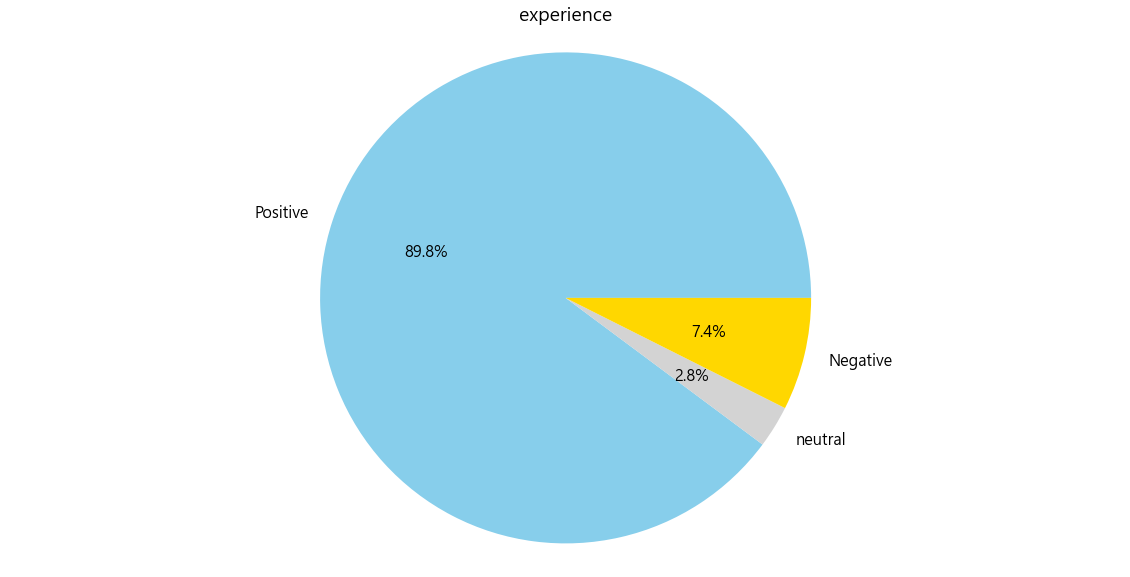

In [13]:
group_size=[nump,n,numn]
group_names=['Positive','neutral','Negative']
colors=['skyblue','lightgrey','gold']
explode=[0.05,0.05,0.05]
plt.pie(group_size,labels=group_names,autopct='%.1f%%',colors=colors)
plt.axis('equal')
plt.title(keyword)